In [196]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

In [366]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

In [367]:
palletes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [368]:
df = df1.merge(df2)

In [369]:
df.drop(['EmployeeNumber', 'Over18'], axis=1, inplace=True)

In [370]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4449 non-null   float64
 1   BusinessTravel            4449 non-null   object 
 2   DailyRate                 4449 non-null   float64
 3   Department                4449 non-null   object 
 4   DistanceFromHome          4449 non-null   float64
 5   Education                 4449 non-null   float64
 6   EducationField            4449 non-null   object 
 7   EmployeeCount             4449 non-null   float64
 8   EnvironmentSatisfaction   4449 non-null   float64
 9   Gender                    4449 non-null   object 
 10  HourlyRate                4449 non-null   float64
 11  JobInvolvement            4449 non-null   float64
 12  JobLevel                  4449 non-null   float64
 13  JobRole                   4449 non-null   object 
 14  JobSatis

## EDA

In [372]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWit

<AxesSubplot:>

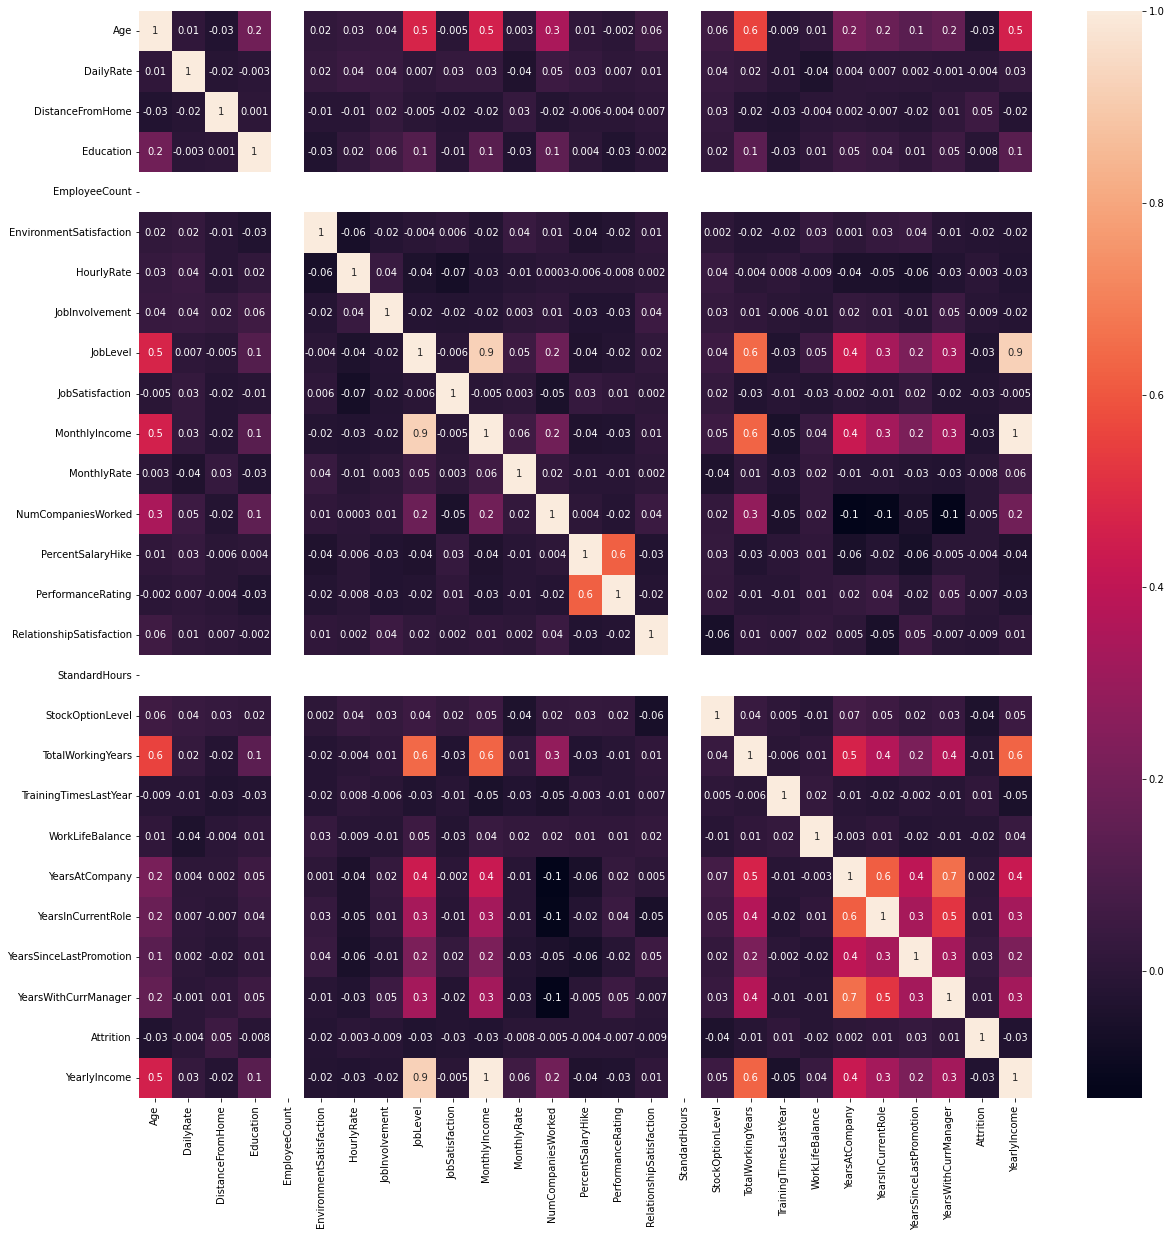

In [300]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.0g')

C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


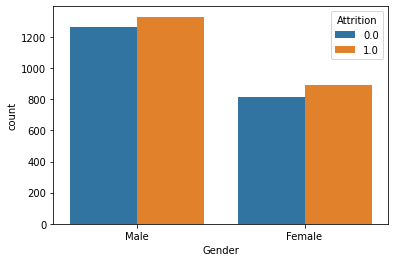

In [255]:
# Gender is not dependent whether attrition is True
sns.countplot(df['Gender'], hue=df['Attrition'])
plt.show()

C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


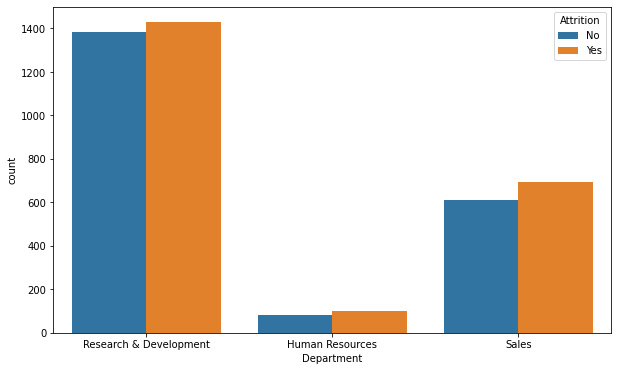

In [243]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Department'], hue=df['Attrition'])
plt.show()

C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


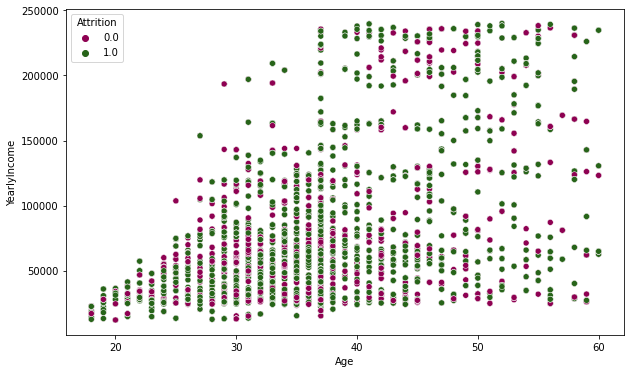

In [294]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df['Age'], df['YearlyIncome'], hue=df['Attrition'], palette=palletes[32])
plt.show()

C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


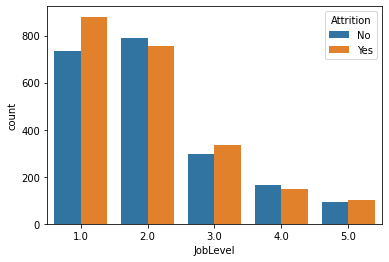

In [306]:
sns.countplot(df['JobLevel'], hue=df['Attrition'])
plt.show()

In [203]:
# We have 298 strange values, over 1000
df['Age'].sort_values().tail(300)

# We have 2 options - delete these, or replace age with NaN or median. Some predictors can work with NaN

2547      60.0
2548      60.0
1545    1107.0
1544    1107.0
1543    1107.0
         ...  
4314    9866.0
4316    9866.0
4315    9866.0
1627    9890.0
1626    9890.0
Name: Age, Length: 300, dtype: float64

In [373]:
# Mean age 
df.Age[df['Age'] < 100].mean()

36.78173933991809

In [374]:
# Replace age with mean, because we have other important features
df.Age[df['Age'] > 100] = 37

In [375]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3147
Travel_Frequently     843
Non-Travel            459
Name: BusinessTravel, dtype: int64

In [376]:
# There is a linear relationship between object values
df['BusinessTravel'][df['BusinessTravel'] == 'Travel_Rarely'] = 1
df['BusinessTravel'][df['BusinessTravel'] == 'Travel_Frequently'] = 2
df['BusinessTravel'][df['BusinessTravel'] == 'Non-Travel'] = 0
df['BusinessTravel'] = df['BusinessTravel'].astype(float)

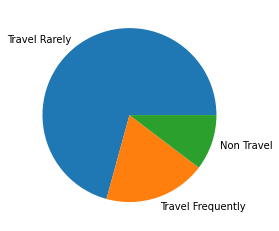

1.0    3147
2.0     843
0.0     459
Name: BusinessTravel, dtype: int64

In [377]:
plt.pie(df['BusinessTravel'].value_counts(),labels=['Travel Rarely', 'Travel Frequently', 'Non Travel'])
plt.show()
df['BusinessTravel'].value_counts()

In [378]:
# there is no correlation between huge values of distance from home and business travel, non rarely
df.loc[:,['DistanceFromHome', 'BusinessTravel']][df['BusinessTravel'] == 0]

,DistanceFromHome,BusinessTravel
22,1.0,0.0
26,1.0,0.0
50,2.0,0.0
57,9.0,0.0
67,26.0,0.0
...,...,...
4436,8.0,0.0
4437,8.0,0.0
4446,918785.0,0.0
4447,918785.0,0.0


In [379]:
df.DistanceFromHome[df['DistanceFromHome'] > 100] = df.DistanceFromHome[df['DistanceFromHome'] > 100] / 100000

In [380]:
df['Gender'][df['Gender'] == 'Male'] = 0.0
df['Gender'][df['Gender'] == 'Female'] = 1.0

In [381]:
df['OverTime'][df['OverTime'] == 'No'] = 0.0
df['OverTime'][df['OverTime'] == 'Yes'] = 1.0

In [382]:
df['Attrition'][df['Attrition'] == 'No'] = 0.0
df['Attrition'][df['Attrition'] == 'Yes'] = 1.0

In [315]:
df_copy = df.copy()

In [384]:
# One hot onecoding
one_hot_dep = pd.get_dummies(df['Department'])
df.drop('Department', axis=1, inplace=True)
df = df.join(one_hot_dep)

# OK

In [317]:
one_hot_dep.head(1)

,Human Resources,Research & Development,Sales
0,0,1,0


In [318]:
one_hot_education.head(1)

,Human Resources Education,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0


In [385]:
one_hot_education = pd.get_dummies(df['EducationField'])
one_hot_education.rename(columns={'Human Resources':'Human Resources Education'}, inplace=True)
df = df.join(one_hot_education)
df.drop('EducationField', axis=1, inplace=True)

In [386]:
one_hot_gender = pd.get_dummies(df['Gender'], drop_first=True)
df = df.join(one_hot_gender, )
df = df.drop('Gender', axis=1)

In [387]:
one_hot_jobrole = pd.get_dummies(df['JobRole'])
one_hot_jobrole.rename(columns={'Human Resources':'Human Resources JobRole'}, inplace=True)
df = df.drop('JobRole', axis=1)
df = df.join(one_hot_jobrole)

In [388]:
one_hot_maritalstatus = pd.get_dummies(df['MaritalStatus'], drop_first=True)
df = df.drop('MaritalStatus', axis=1)
df = df.join(one_hot_maritalstatus)

In [389]:
one_hot_overtime.columns

Float64Index([1.0], dtype='float64')

In [330]:
# one_hot_overtime = pd.get_dummies(df['OverTime'], drop_first=True)
# one_hot_overtime.rename(columns={[1.0]:'OverTime'}, inplace=True)
# # df = df.drop('OverTime', axis=1)
# df = df.join(one_hot_overtime)

In [395]:
df.dropna(subset=['Attrition'], inplace=True)

In [444]:
X = df.drop('Attrition', axis=1) 
y = df['Attrition'].astype(float)

In [445]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Precision: 0.5444234404536862 
Accuracy: 0.5243996901626646 
Recall: 0.4357034795763994
F1 Score: 0.48403361344537815


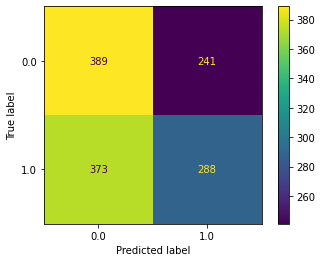

In [399]:
knn = KNeighborsClassifier()

params_knn = { 'n_neighbors' : np.arange(3, 50, 2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_knn = GridSearchCV(estimator = knn, param_grid=params_knn, cv=3, verbose=1)
model_knn = grid_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print(f'Precision: {precision_score(y_test, y_pred_knn)} \nAccuracy: {accuracy_score(y_test, y_pred_knn)} \nRecall: {recall_score(y_test, y_pred_knn)}\nF1 Score: {f1_score(y_test, y_pred_knn)}')
plot_confusion_matrix(model_knn, X_test_scaled, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Precision: 0.6287519747235387 
Accuracy: 0.6142525174283501 
Recall: 0.6021180030257186
F1 Score:0.6151468315301392


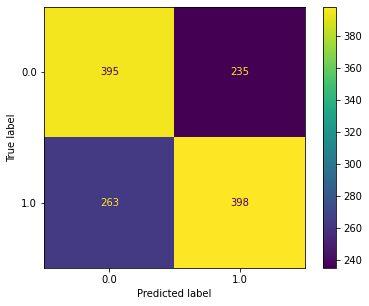

In [446]:
ada = AdaBoostClassifier()

params_ada = {'n_estimators': (0, 1000, 50)} # (np.arange (400, 500, 5), 465 was the best

grid_ada = GridSearchCV(estimator = ada, param_grid=params_ada, cv=3, verbose=1)
model_ada = grid_ada.fit(X_train_scaled, y_train)
y_pred_ada = model_ada.predict(X_test_scaled)
print(f'Precision: {precision_score(y_test, y_pred_ada)} \nAccuracy: {accuracy_score(y_test, y_pred_ada)} \nRecall: {recall_score(y_test, y_pred_ada)}\nF1 Score:{f1_score(y_test, y_pred_ada)}')
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plot_confusion_matrix(model_ada, X_test_scaled, y_test, ax=ax)
plt.show()

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Precision: 0.6997578692493946 
Accuracy: 0.6158017041053447 
Recall: 0.4372163388804841
F1 Score: 0.5381750465549348


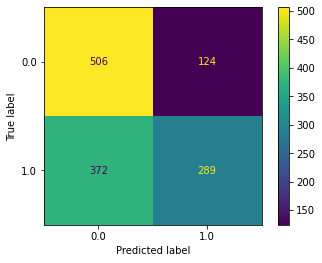

In [402]:
lg = LogisticRegression()

params_lg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}
grid_lg = GridSearchCV(estimator = lg, param_grid=params_lg, cv=3, verbose=1)
model_lg = grid_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_test)
print(f'Precision: {precision_score(y_test, y_pred_lg)} \nAccuracy: {accuracy_score(y_test, y_pred_lg)} \nRecall: {recall_score(y_test, y_pred_lg)}\nF1 Score: {f1_score(y_test, y_pred_lg)}')
plot_confusion_matrix(model_lg, X_test, y_test)

## Feature selection

In [403]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

print(X.shape)
scaler = MinMaxScaler()
feature_selection = RFE(LogisticRegression())

X_scaled = scaler.fit_transform(X)
feature_selection = feature_selection.fit(X_scaled, y)

print(feature_selection.support_)
print(feature_selection.ranking_)

X_selected = feature_selection.transform(X_scaled)
X_selected.shape

(4302, 49)
[ True False False False False False  True False  True  True  True  True
 False False  True False False False False  True  True  True  True  True
  True  True  True False  True False False  True  True  True  True False
 False False False  True  True False  True False False False  True False
 False]
[ 1 21 14 18 19 25  1 23  1  1  1  1  8  7  1 13 12 15 26  1  1  1  1  1
  1  1  1  9  1  4 22  1  1  1  1 17 16 20  2  1  1 11  1 24  3 10  1  5
  6]


(4302, 24)

In [447]:
df_feature_selection = df.iloc[:, [0, 6, 8, 9, 10, 11, 14, 19, 20, 21, 22, 23, 24, 25, 26, 28, 31, 32, 33, 34, 39, 40, 42, 46]]

In [448]:
X = df_feature_selection
y = df['Attrition'].astype(float)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ada = AdaBoostClassifier()

params_ada = {'n_estimators': range(0, 5000, 50)} 

grid_ada = GridSearchCV(estimator = ada, param_grid=params_ada, cv=3, verbose=1)
model_ada = grid_ada.fit(X_train_scaled, y_train)
y_pred_ada = model_ada.predict(X_test_scaled)
print(f'Precision: {precision_score(y_test, y_pred_ada)} \nAccuracy: {accuracy_score(y_test, y_pred_ada)} \nRecall: {recall_score(y_test, y_pred_ada)}\nF1 Score:{f1_score(y_test, y_pred_ada)}')
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plot_confusion_matrix(model_ada, X_test_scaled, y_test, ax=ax)
plt.show()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Precision: 0.6355785837651122 
Accuracy: 0.6096049573973664 
Recall: 0.556732223903177
F1 Score: 0.5935483870967742


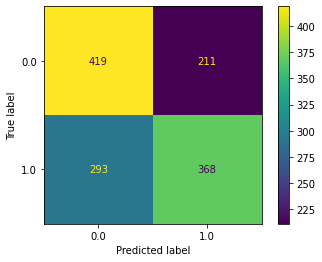

In [433]:
lg = LogisticRegression()

params_lg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}
grid_lg = GridSearchCV(estimator = lg, param_grid=params_lg, cv=3, verbose=1)
model_lg = grid_lg.fit(X_train_scaled, y_train)
y_pred_lg = model_lg.predict(X_test_scaled)
print(f'Precision: {precision_score(y_test, y_pred_lg)} \nAccuracy: {accuracy_score(y_test, y_pred_lg)} \nRecall: {recall_score(y_test, y_pred_lg)}\nF1 Score: {f1_score(y_test, y_pred_lg)}')
plot_confusion_matrix(model_lg, X_test_scaled, y_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Precision: 0.5286506469500925 
Accuracy: 0.512006196746708 
Recall: 0.43267776096822996
F1 Score: 0.47587354409317806


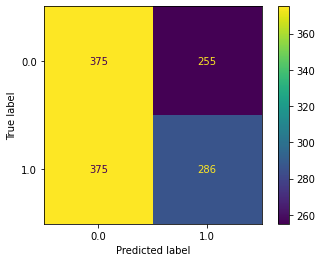

In [434]:
knn = KNeighborsClassifier()

params_knn = { 'n_neighbors' : np.arange(3, 50, 2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_knn = GridSearchCV(estimator = knn, param_grid=params_knn, cv=3, verbose=1)
model_knn = grid_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print(f'Precision: {precision_score(y_test, y_pred_knn)} \nAccuracy: {accuracy_score(y_test, y_pred_knn)} \nRecall: {recall_score(y_test, y_pred_knn)}\nF1 Score: {f1_score(y_test, y_pred_knn)}')
plot_confusion_matrix(model_knn, X_test_scaled, y_test)